In [11]:
import pyaudio

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib notebook

import numpy as np
from IPython.display import Audio

from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion 
from scipy.ndimage.morphology import iterate_structure

In [5]:
FORMAT = pyaudio.paInt16
SF = 44100
FRAME_SIZE = 1024
NO_FRAMES = 220

p = pyaudio.PyAudio()
print('Recording for 6 seconds')

stream = p.open(format=FORMAT,
                channels=1,
                rate=SF,
                input=True,
                frames_per_buffer=FRAME_SIZE)

data = stream.read(NO_FRAMES * FRAME_SIZE)

print('Done recording.')

decoded = np.fromstring(data, 'Int16')

stream.stop_stream()
stream.close()
p.terminate()

Recording for 6 seconds
Done recording.


In [27]:
def local_peaks(data):
    fp = generate_binary_structure(rank=2, connectivity=1)
    fp = iterate_structure(fp, 3)
    local_maxima = maximum_filter(data, footprint=fp)
    peaks = local_maxima == data
    return np.logical_and(peaks, local_maxima > 0)

def plot_compare(data, peak_finding_function):
    fig, ax = plt.subplots()
    peaks = peak_finding_function(data)
    ax.imshow(peaks)
    return peaks, data, fig, ax

<IPython.core.display.Javascript object>


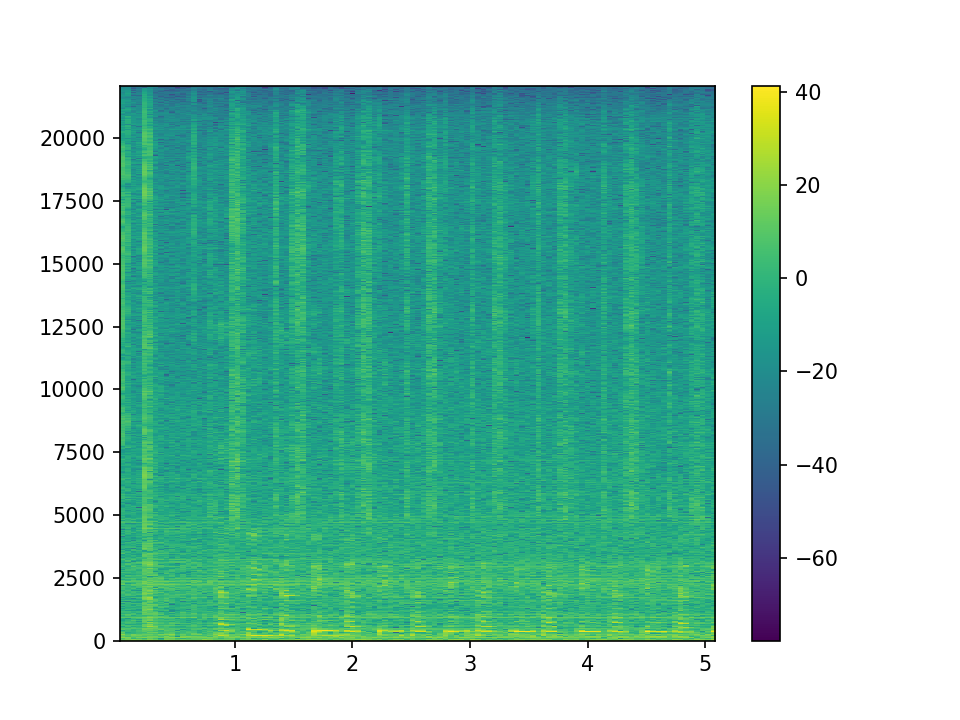

In [6]:
fig, ax = plt.subplots()
S, freqs, times, im = ax.specgram(decoded, NFFT=4096, Fs=44100,
                                 window=mlab.window_hanning,
                                 noverlap=(4096 // 2))
fig.colorbar(im)

<IPython.core.display.Javascript object>


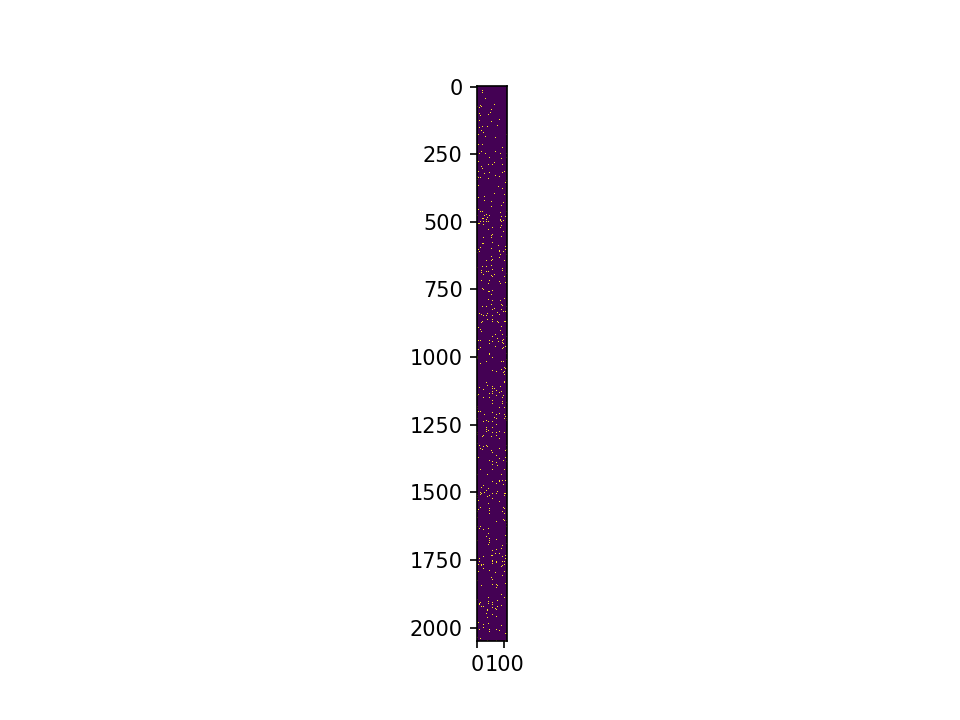

In [36]:
peaks, data, fig, ax = plot_compare(S, local_peaks)

In [12]:

import pyaudio
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion 
from scipy.ndimage.morphology import iterate_structure

# Constants
FORMAT = pyaudio.paInt16
SF = 44100
FRAME_SIZE = 1024
NO_FRAMES = 440


def record(secs, format=FORMAT, sampling_frequency=SF, frame_size=FRAME_SIZE, nframes=NO_FRAMES):
    p = pyaudio.PyAudio()
    print('Recording for', secs, 'seconds')

    stream = p.open(format=format,
                    channels=1,
                    rate=sampling_frequency,
                    input=True,
                    frames_per_buffer=frame_size) # frames_per_buffer refers to a number of sample frames

    data = stream.read(nframes * frame_size)
    print('Done recording.')
    stream.stop_stream()
    stream.close()
    p.terminate()

    return np.fromstring(data, 'Int16')


def spectrogram(decoded):
    fig, ax = plt.subplots()
    S, freqs, times, im = ax.specgram(decoded, NFFT=4096, Fs=44100,
                                     window=mlab.window_hanning,
                                     noverlap=(4096 // 2))
    return S


def get_recording(seconds):
    samples = record(seconds)
    return spectrogram(samples), samples

recording = record(10)

Recording for 10 seconds
Done recording.


TypeError: unorderable types: NoneType() <= int()

In [1]:
spectrogram(recording)

NameError: name 'spectrogram' is not defined

In [3]:
from microphone import record_audio

In [4]:
byte_encoded_signal, sampling_rate = record_audio(10)

No microphone configuration file found, attempting to find default device..
Using input device 'Microphone Array (Realtek High '
Recording ended


In [5]:
byte_encoded_signal

[b'\x00\x00\x01\x00\xff\xff\x00\x00\x00\x00\x01\x00\xff\xff\x00\x00\xff\xff\x01\x00\xfe\xff\x02\x00\xfe\xff\x02\x00\xfe\xff\x01\x00\x00\x00\xff\xff\x04\x00\xf9\xff\n\x00\xf0\xff\x17\x00\xdf\xff/\x00\xbe\xff`\x00g\xff)\x01\xd9\xfa\xd5\xf5\xa8\xf7\xa9\xf6L\xf7\xc8\xf6V\xf7\xf2\xf6#\xf7\xf2\xf6\x1b\xf7\x07\xf7\xe4\xf6\xec\xf6\xf3\xf6\xfa\xf6\xef\xf6\x01\xf7\xfe\xf6\x16\xf7\x04\xf7\xf6\xf60\xf7\x06\xf7\x1e\xf7"\xf7\x1c\xf7$\xf7\x0f\xf7\x17\xf7\x1c\xf7\x07\xf7!\xf7\xfb\xf6 \xf7-\xf7\x10\xf7\x10\xf7\xfa\xf6$\xf7\x1a\xf7\x19\xf7\x13\xf7\x16\xf7\xf2\xf6\x18\xf7\x16\xf7\x05\xf7\x13\xf7$\xf7$\xf7\'\xf70\xf7\x18\xf7\x17\xf7>\xf7\x19\xf7:\xf7/\xf7\x1d\xf7(\xf7\r\xf7I\xf7\x1e\xf7E\xf7 \xf7$\xf7\'\xf7\x1e\xf7A\xf7"\xf7G\xf7 \xf7C\xf7E\xf7\x1d\xf7;\xf7@\xf7G\xf7g\xf7I\xf7[\xf7f\xf7n\xf7o\xf7l\xf7Z\xf7q\xf7m\xf7S\xf7~\xf7~\xf7\x83\xf7\x7f\xf7d\xf7w\xf7\x87\xf7`\xf7n\xf7\x87\xf7z\xf7\x88\xf7~\xf7\x88\xf7\x9e\xf7\x95\xf7\xa1\xf7\x9a\xf7\xb5\xf7\xa9\xf7\xb6\xf7\xc4\xf7\xd2\xf7\xd7\xf7\xcc\xf7\xf4\xf7\xec